<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# Занятие 2. Визуальный анализ данных
## Практическое задание. Визуальный анализ данных пассажиров "Титаника"

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


**Считываем обучающую выборку.**

In [2]:
train_df = pd.read_csv("../../data/titanic_train.csv", index_col='PassengerId') 

In [3]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Заполним пропуски медианными значениями.**

In [8]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

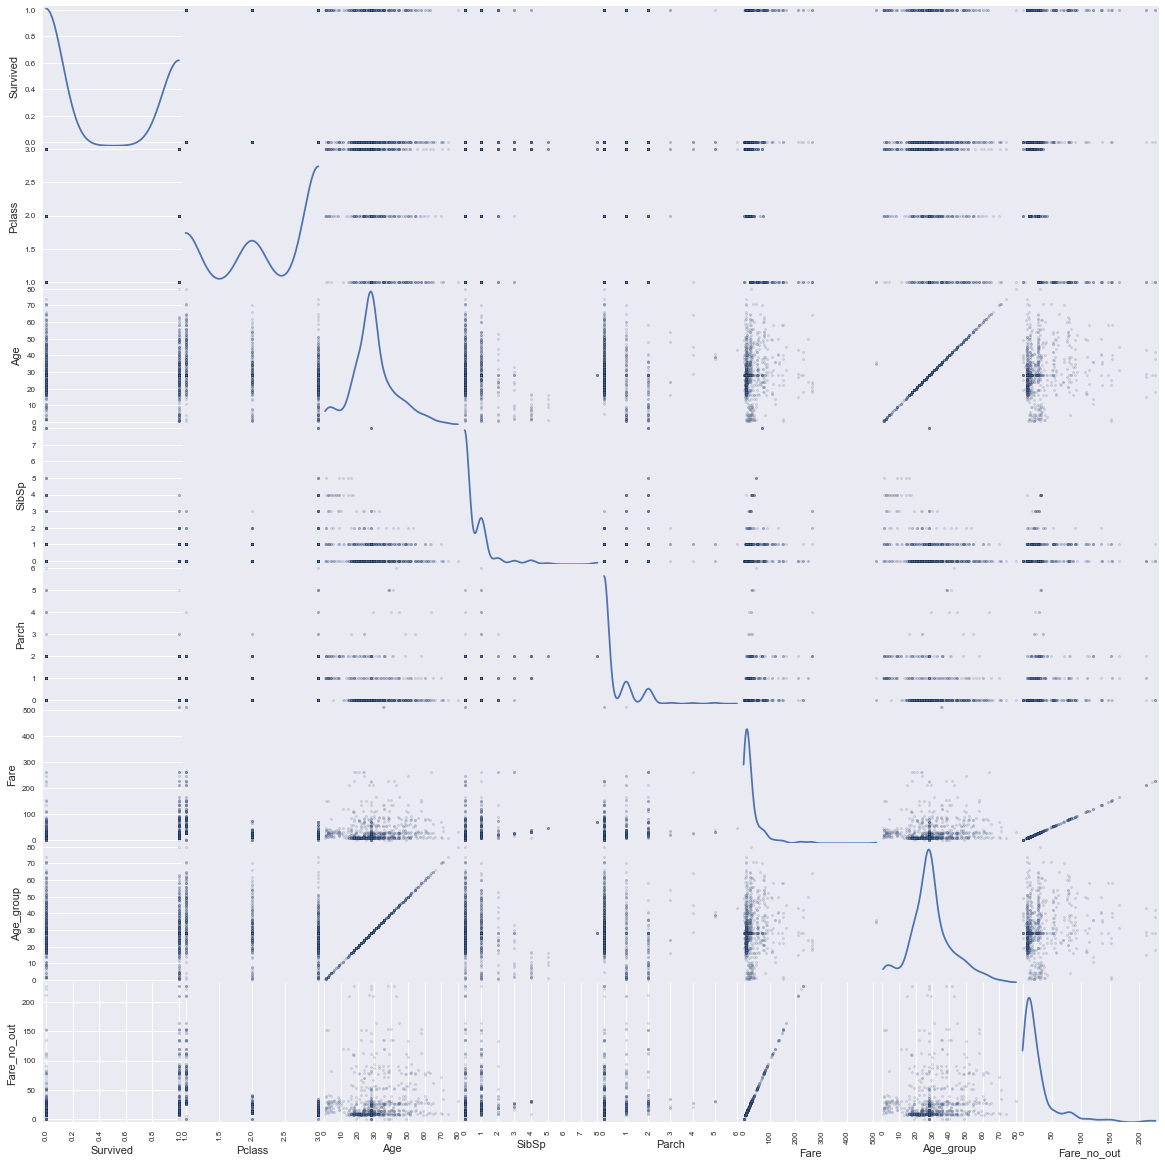

In [83]:
# Ваш код здесь
pd.scatter_matrix(train_df, alpha=0.2, figsize=(20, 20), diagonal='kde');

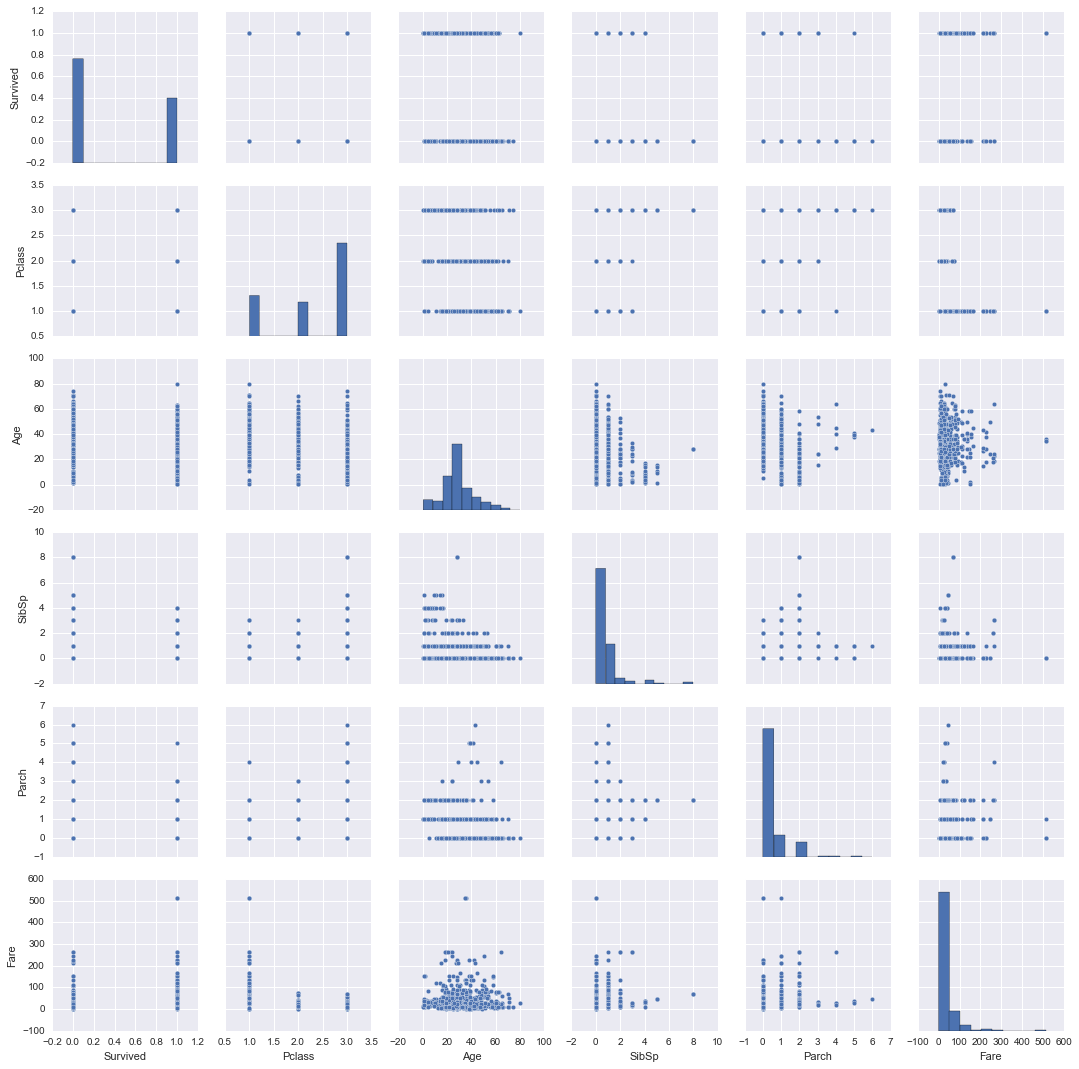

In [15]:
sns.pairplot(train_df)

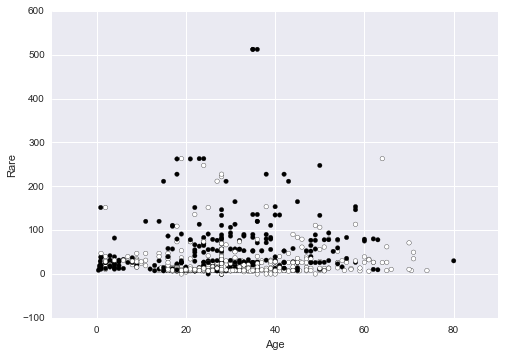

In [57]:
scatter(x = train_df['Age'], y = train_df['Fare'], c = train_df['Survived'])
xlabel('Age')
ylabel('Rare')

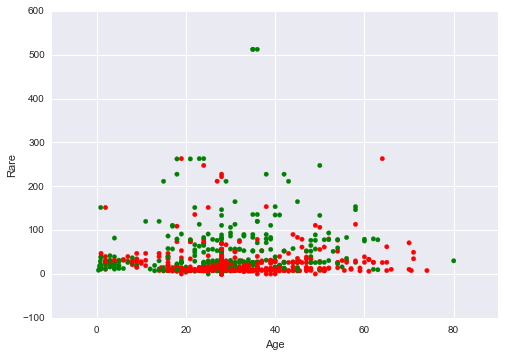

In [65]:
scatter(x = train_df['Age'], y = train_df['Fare'], color = train_df['Survived'].apply(lambda survived: 
                                                                                      'green' if survived ==1 else 'red'))
xlabel('Age')
ylabel('Rare')

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

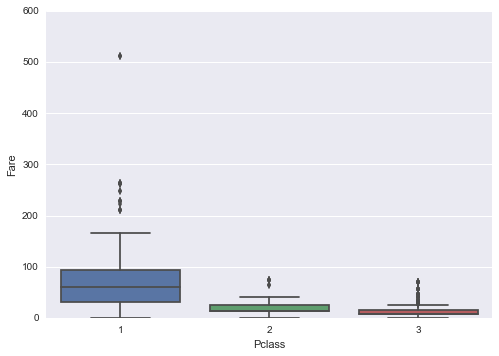

In [33]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` - стоимости без выбросов, в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: Надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [49]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - fare_pclass1.mean()).abs()  < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - fare_pclass2.mean()).abs()  < 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 - fare_pclass3.mean()).abs()  < 2 * fare_pclass3.std()]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)

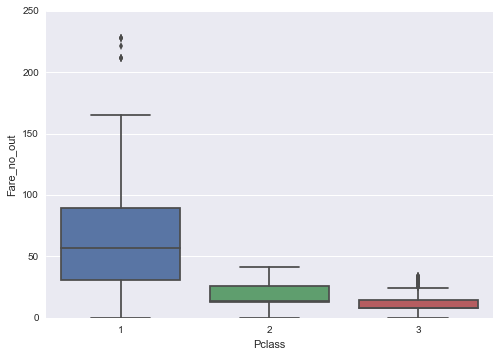

In [50]:
sns.boxplot(x='Pclass', y='Fare_no_out', data=train_df)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

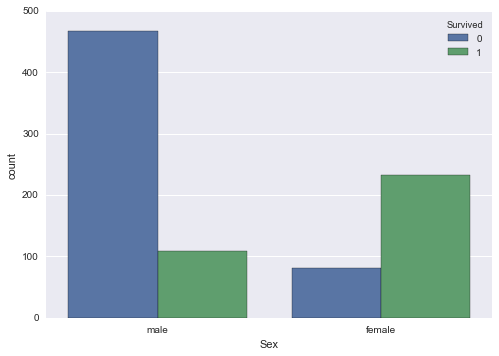

In [20]:
# Ваш код здесь

sns.countplot(x='Sex', hue = 'Survived', data = train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

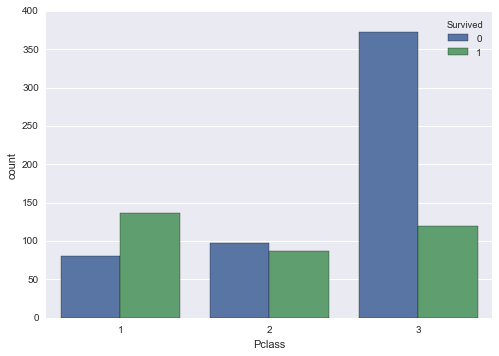

In [21]:
# Ваш код здесь
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали.**

In [ ]:
#лучше разбить на интервалы и в каждом интервале посмотреть выжил/не выжил

In [51]:
train_df['Age_group'] = train_df['Age']

In [ ]:
Age_1 = train_df[train_df['Age'] <= 20]['Fare']
Age_2 = train_df[train_df['Age'] > 20]['Fare'] & train_df[train_df['Age'] < 40]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = fare_pclass1[(fare_pclass1 - fare_pclass1.mean()).abs()  < 2 * fare_pclass1.std()]
fare_pclass2_no_out = fare_pclass2[(fare_pclass2 - fare_pclass2.mean()).abs()  < 2 * fare_pclass2.std()]
fare_pclass3_no_out = fare_pclass3[(fare_pclass3 - fare_pclass3.mean()).abs()  < 2 * fare_pclass3.std()]
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out).append(fare_pclass3_no_out)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1300c9d90>]], dtype=object)

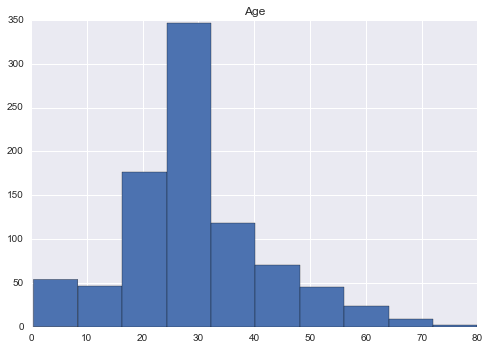

In [35]:
train_df.hist('Age')

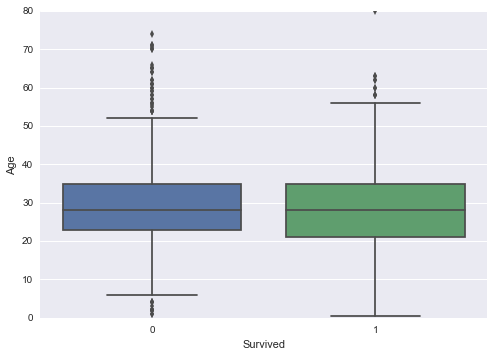

In [23]:
# Ваш код здесь
sns.boxplot(x='Survived', y='Age', data=train_df)

In [66]:
from scipy.stats import ttest_ind

In [71]:
surv_ages = train_df[train_df["Survived"] == 1]["Age"]
died_ages = train_df[train_df["Survived"] == 0]["Age"]

In [72]:
ttest_ind(surv_ages,died_ages)

Ttest_indResult(statistic=-1.9394659179476366, pvalue=0.052760688475855501)

In [73]:
# формально отвергается, но очень близко, так что на уровне значимости не отвергаем Ho гипотезу
#данные пограничные, поэтом если убрать выбросы - надо посмотреть!!!! вполне возможно будет значимым

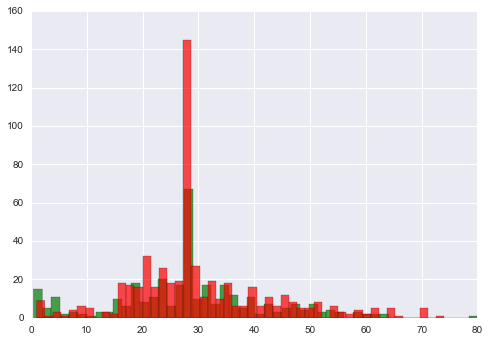

In [82]:
surv_ages.hist(alpha = 0.7, bins=50, color = 'green')
died_ages.hist(alpha = 0.7, bins=50, color = 'red')

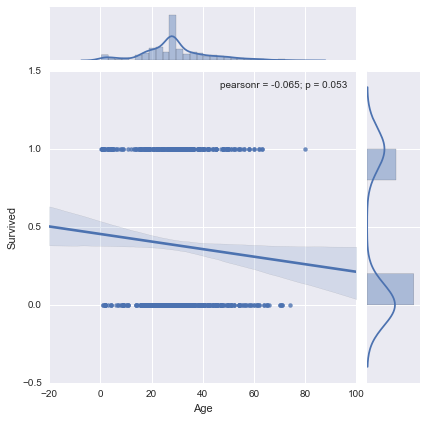

In [26]:
sns.jointplot(x='Age', y='Survived', 
              data=train_df, kind='reg')

In [32]:
train_df.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000
